In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy.signal import spectrogram

In [11]:
#Block audio function
def  block_audio(x,blockSize,hopSize,fs):
    # allocate memory
    numBlocks = math.ceil(x.size / hopSize)
    xb = np.zeros([numBlocks, blockSize])
    # compute time stamps
    t = (np.arange(0, numBlocks) * hopSize) / fs

    x = np.concatenate((x, np.zeros(blockSize)),axis=0)

    for n in range(0, numBlocks):
        i_start = n * hopSize
        i_stop = np.min([x.size - 1, i_start + blockSize - 1])

        xb[n][np.arange(0,blockSize)] = x[np.arange(i_start, i_stop + 1)]

    return (xb,t)

In [12]:
#Hann window function
def compute_hann(iWindowLength):
    return 0.5 - (0.5 * np.cos(2 * np.pi / iWindowLength * np.arange(iWindowLength)))


In [75]:
def compute_spectrogram(xb, fs):
    (NumOfBlocks, blockSize) = xb.shape
    hann=compute_hann(iWindowLength=blockSize)
    fInHz, t, X = spectrogram(xb, fs, window=hann, nfft=blockSize)
##need to move the plt and print statements to main section at the end
    #plt.pcolormesh(t, fInHz, X)
    #plt.ylabel('Frequency [Hz]')
    #plt.xlabel('Time [sec]')
    #plt.show()
    X = np.array(X)
    fInHz = np.array(fInHz)
    #print(X.shape)
    #print(fInHz.shape)
    return (X, fInHz)

In [76]:
def track_pitch_fftmax(x, blockSize, hopSize, fs):
    (xb, timeInSec) = block_audio(x, blockSize, hopSize, fs)
    (X, fInHz) = compute_spectrogram(xb, fs)

    # get index of max magnitude within each block and the corresponding frequency 
    nBlocks=len(timeInSec)
    f0=np.zeros(nBlocks)
    for block in range (0,nBlocks-1):
        i=np.argmax(X[block,:,0])
        f0[block]=fInHz[i]
        
    return (f0,timeInSec)

In [110]:
#E1. generate a test signal (sine wave, f = 441 Hz from 0-1 sec and f = 882 Hz from 1-2 sec),

fs = 44100
timeA = np.linspace(start=0, stop=1, num=fs, endpoint=False)
timeB = np.linspace(start=1, stop=2, num=fs, endpoint=False)

# generate test signals at 441 Hz from 0 to 1 sec and 882 Hz from 1 to 2 sec
testsignalA = np.sin(2 * np.pi * 441 * timeA)
testsignalB = np.sin(2 * np.pi * 882 * timeB)

# append arrays to create a 2 sec test signal
testSignal = np.append(testsignalA, testsignalB)

In [111]:
#check dimensions of vectors created by functions above 
(xb, timeInSec) = block_audio(x=testSignal, blockSize=1024, hopSize=512, fs=44100)
print('xb shape=',xb.shape)
print('timeInSec shape=',timeInSec.shape)
(X, fInHz) = compute_spectrogram(xb=xb, fs=44100)
print ('X shape=',X.shape)
print('fInHz shape=',fInHz.shape)

xb shape= (173, 1024)
timeInSec shape= (173,)
X shape= (173, 513, 1)
fInHz shape= (513,)


In [112]:
(f0TestMaxPeak,timeTestMaxPeak)=track_pitch_fftmax(x=testSignal,blockSize=1024,hopSize=512,fs=44100)

In [113]:
print('f0TestMaxPeak first few elements',f0TestMaxPeak[0:10])
print('timetestMaxPeak first few elements',timeTestMaxPeak[0:10])

f0TestMaxPeak first few elements [430.6640625 430.6640625 430.6640625 430.6640625 430.6640625 430.6640625
 430.6640625 430.6640625 430.6640625 430.6640625]
timetestMaxPeak first few elements [0.         0.01160998 0.02321995 0.03482993 0.04643991 0.05804989
 0.06965986 0.08126984 0.09287982 0.1044898 ]


In [114]:
max(f0TestMaxPeak)

861.328125

In [115]:
min(f0TestMaxPeak)

0.0

In [116]:
nBlocks=len(timeInSec)
trueF=np.zeros(nBlocks)
for i in range(0,nBlocks-1):
    if timeInSec[i]<1:
        trueF[i]=440
    else:
        trueF[i]=880        

<function matplotlib.pyplot.show(*args, **kw)>

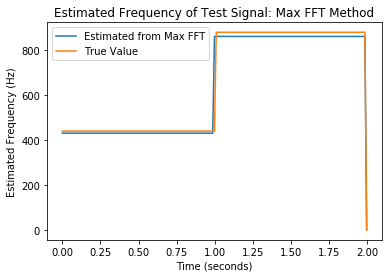

In [102]:
plt.plot(timeInSec,f0TestMaxPeak,label="Estimated from Max FFT")
plt.plot(timeInSec,trueF, label="True Value")
plt.xlabel('Time (seconds)')
plt.ylabel('Estimated Frequency (Hz)')
plt.title('Estimated Frequency of Test Signal: Max FFT Method')
plt.legend()
plt.show   